In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append('..')


from src.data_preprocessing.load_data import load_data
from src.data_preprocessing.clean_data import datetime_conversion, drop_na
from src.data_preprocessing.features_engineering import log_return, volatility, range_of_motion


In [3]:
df = load_data('../data/raw/bitcoin_2010-07-17_2024-06-28.csv')
df.head()

Data loaded successfully from ../data/raw/bitcoin_2010-07-17_2024-06-28.csv


,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-06-27,2024-06-28,60882.90,62338.43,60666.19,61646.05,1.215887e+11,1.208392e+12
1,2024-06-26,2024-06-27,61733.99,62357.58,60761.24,60761.24,1.017576e+11,1.210544e+12
2,2024-06-25,2024-06-26,60317.99,62231.16,60272.58,61789.98,1.050312e+11,1.208415e+12
3,2024-06-24,2024-06-25,63168.03,63316.01,58946.24,60382.81,8.828355e+10,1.211101e+12
4,2024-06-23,2024-06-24,64276.04,64521.03,63290.43,63290.43,6.853945e+10,1.265327e+12


In [4]:
datetime_conversion(df, 'Start')
datetime_conversion(df, 'End')

DateTime conversion successful for column 'Start'.
DateTime conversion successful for column 'End'.


In [5]:
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-06-27,2024-06-28,60882.90,62338.43,60666.19,61646.05,1.215887e+11,1.208392e+12
1,2024-06-26,2024-06-27,61733.99,62357.58,60761.24,60761.24,1.017576e+11,1.210544e+12
2,2024-06-25,2024-06-26,60317.99,62231.16,60272.58,61789.98,1.050312e+11,1.208415e+12
3,2024-06-24,2024-06-25,63168.03,63316.01,58946.24,60382.81,8.828355e+10,1.211101e+12
4,2024-06-23,2024-06-24,64276.04,64521.03,63290.43,63290.43,6.853945e+10,1.265327e+12


In [6]:
print("data shape",df.shape)
print("data info", df.info())

data shape (5095, 8)
<class 'pandas.DataFrame'>
RangeIndex: 5095 entries, 0 to 5094
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       5095 non-null   datetime64[us]
 1   End         5095 non-null   datetime64[us]
 2   Open        5095 non-null   float64       
 3   High        5095 non-null   float64       
 4   Low         5095 non-null   float64       
 5   Close       5095 non-null   float64       
 6   Volume      5095 non-null   float64       
 7   Market Cap  5095 non-null   float64       
dtypes: datetime64[us](2), float64(6)
memory usage: 318.6 KB
data info None


In [7]:
df.describe()

,Start,End,Open,High,Low,Close,Volume,Market Cap
count,5095,5095,5095.000000,5095.000000,5095.000000,5095.000000,5.095000e+03,5.095000e+03
mean,2017-07-07 00:00:00,2017-07-08 00:00:00,11831.709218,12102.805318,11547.069465,11844.945596,2.135086e+10,2.229693e+11
min,2010-07-17 00:00:00,2010-07-18 00:00:00,0.050000,0.050000,0.050000,0.050000,0.000000e+00,0.000000e+00
25%,2014-01-10 12:00:00,2014-01-11 12:00:00,230.301000,234.604500,226.953000,230.385500,8.455034e+06,3.295801e+09
50%,2017-07-07 00:00:00,2017-07-08 00:00:00,2608.560000,2757.940000,2538.550000,2610.600000,1.224709e+09,4.296678e+10
75%,2020-12-31 12:00:00,2021-01-01 12:00:00,17113.088459,17444.750278,16833.803874,17098.057468,3.429250e+10,3.253326e+11
max,2024-06-27 00:00:00,2024-06-28 00:00:00,72961.030000,73628.430000,71333.360000,73087.950000,2.121515e+11,1.428493e+12
std,NaN,NaN,17422.697478,17813.944837,17006.738229,17438.748935,3.373560e+10,3.352850e+11


In [8]:
df.isnull().sum()

Start         0
End           0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
log_return(df)
range_of_motion(df)
volatility(df)


df.head()

Log return calculation successful.
Range of motion calculation successful.
Volatility calculation successful.


,Start,End,Open,High,Low,Close,Volume,Market Cap,Log_Return,Range_of_Motion,Volatility
0,2024-06-27,2024-06-28,60882.90,62338.43,60666.19,61646.05,1.215887e+11,1.208392e+12,NaN,1672.24,NaN
1,2024-06-26,2024-06-27,61733.99,62357.58,60761.24,60761.24,1.017576e+11,1.210544e+12,-0.014457,1596.34,NaN
2,2024-06-25,2024-06-26,60317.99,62231.16,60272.58,61789.98,1.050312e+11,1.208415e+12,0.016789,1958.58,NaN
3,2024-06-24,2024-06-25,63168.03,63316.01,58946.24,60382.81,8.828355e+10,1.211101e+12,-0.023037,4369.77,NaN
4,2024-06-23,2024-06-24,64276.04,64521.03,63290.43,63290.43,6.853945e+10,1.265327e+12,0.047030,1230.60,NaN


In [11]:
df = drop_na(df)

Dropped 30 rows with missing values.


In [12]:
df.shape

(5065, 11)

In [13]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5065 entries, 0 to 5064
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Start            5065 non-null   datetime64[us]
 1   End              5065 non-null   datetime64[us]
 2   Open             5065 non-null   float64       
 3   High             5065 non-null   float64       
 4   Low              5065 non-null   float64       
 5   Close            5065 non-null   float64       
 6   Volume           5065 non-null   float64       
 7   Market Cap       5065 non-null   float64       
 8   Log_Return       5065 non-null   float64       
 9   Range_of_Motion  5065 non-null   float64       
 10  Volatility       5065 non-null   float64       
dtypes: datetime64[us](2), float64(9)
memory usage: 435.4 KB


In [14]:
df.describe()

,Start,End,Open,High,Low,Close,Volume,Market Cap,Log_Return,Range_of_Motion,Volatility
count,5065,5065,5065.000000,5065.000000,5065.000000,5065.000000,5.065000e+03,5.065000e+03,5065.000000,5065.000000,5065.000000
mean,2017-06-22 00:00:00,2017-06-23 00:00:00,11506.134500,11773.995138,11225.311866,11520.769733,2.090521e+10,2.165025e+11,-0.002787,548.683272,0.222756
min,2010-07-17 00:00:00,2010-07-18 00:00:00,0.050000,0.050000,0.050000,0.050000,0.000000e+00,0.000000e+00,-0.539996,0.000000,0.039128
25%,2014-01-03 00:00:00,2014-01-04 00:00:00,229.780000,233.205000,226.247000,229.794000,7.071457e+06,3.276519e+09,-0.018942,4.356000,0.134577
50%,2017-06-22 00:00:00,2017-06-23 00:00:00,2518.440000,2595.000000,2450.800000,2522.070000,1.043389e+09,4.153901e+10,-0.001614,78.482096,0.182761
75%,2020-12-09 00:00:00,2020-12-10 00:00:00,16818.780905,17070.574511,16507.390600,16802.194300,3.349805e+10,3.207174e+11,0.013276,594.447200,0.261948
max,2024-05-28 00:00:00,2024-05-29 00:00:00,72961.030000,73628.430000,71333.360000,73087.950000,2.121515e+11,1.428493e+12,0.518084,11999.886416,0.897643
std,NaN,NaN,16949.845263,17343.696908,16531.950116,16970.856551,3.332141e+10,3.255148e+11,0.049945,1035.819210,0.143599


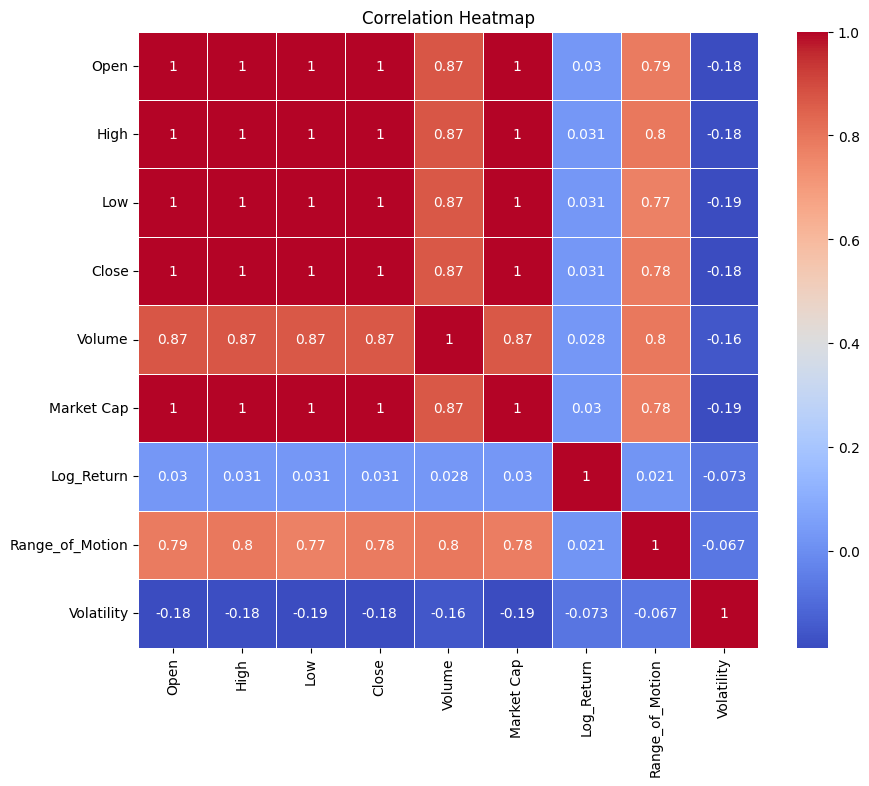

In [15]:
num_col = df.select_dtypes(include='number').columns


# Compute the correlation matrix for numerical columns
correlation_matrix = df[num_col].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

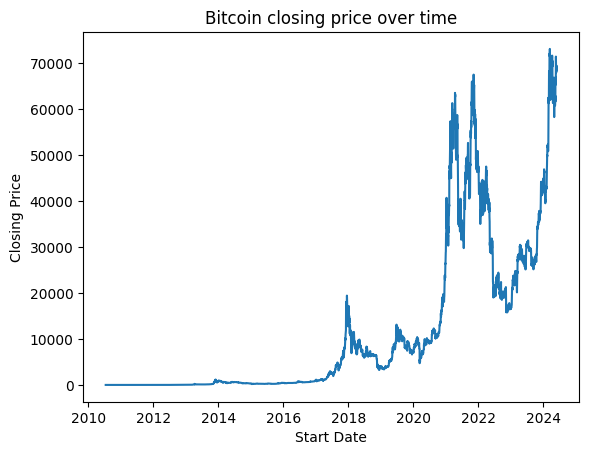

In [27]:

plt.figure()
plt.plot(df['Start'], df['Close'])
plt.title("Bitcoin closing price over time")
plt.xlabel('Start Date')
plt.ylabel('Closing Price')
plt.show()

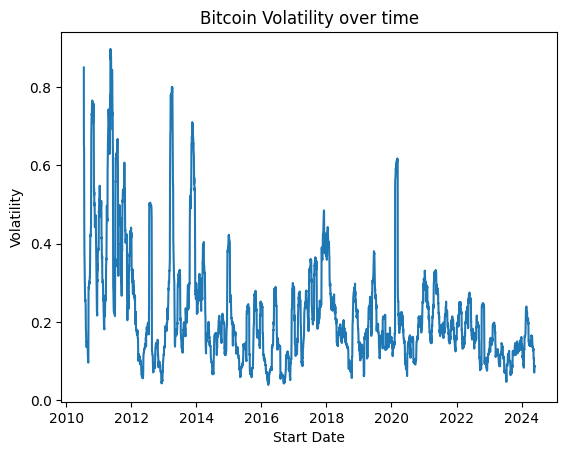

In [17]:
plt.figure()
plt.plot(df['Start'], df['Volatility'])
plt.title("Bitcoin Volatility over time")
plt.xlabel('Start Date')
plt.ylabel('Volatility')
plt.show()

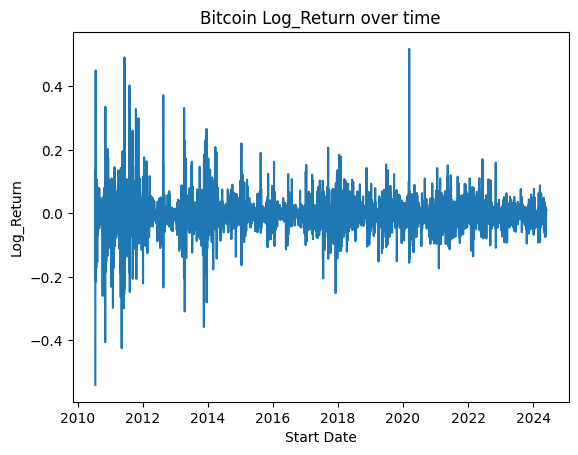

In [18]:
plt.figure()
plt.plot(df['Start'], df['Log_Return'])
plt.title("Bitcoin Log_Return over time")
plt.xlabel('Start Date')
plt.ylabel('Log_Return')
plt.show()

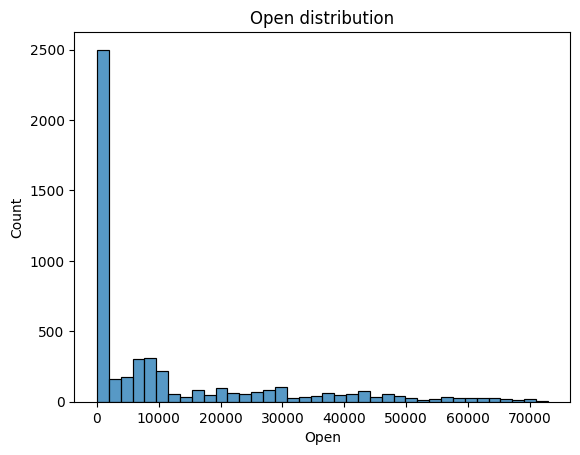

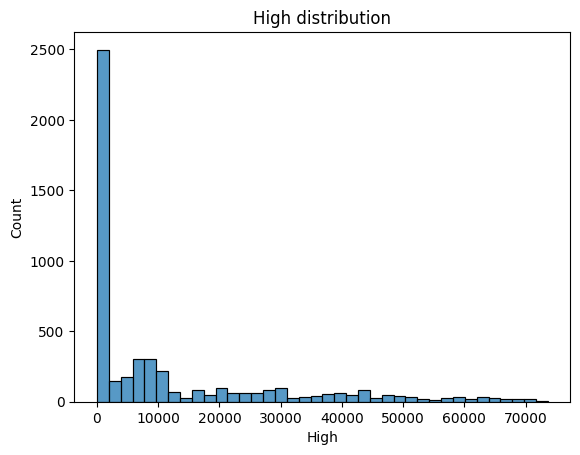

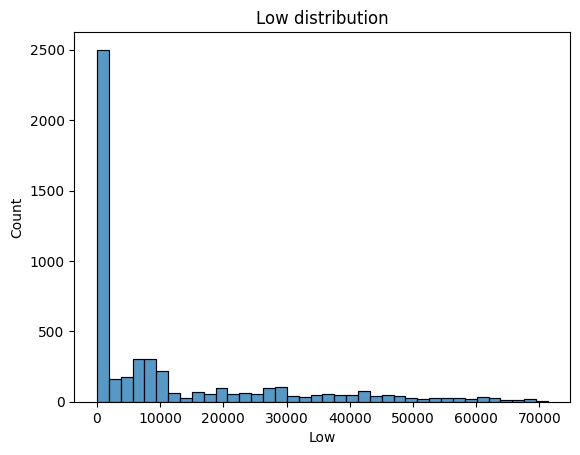

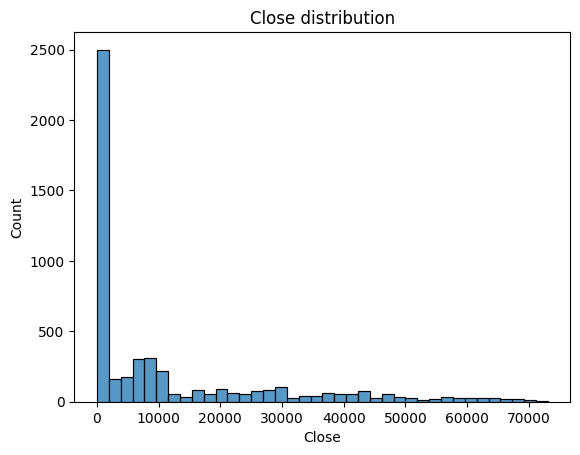

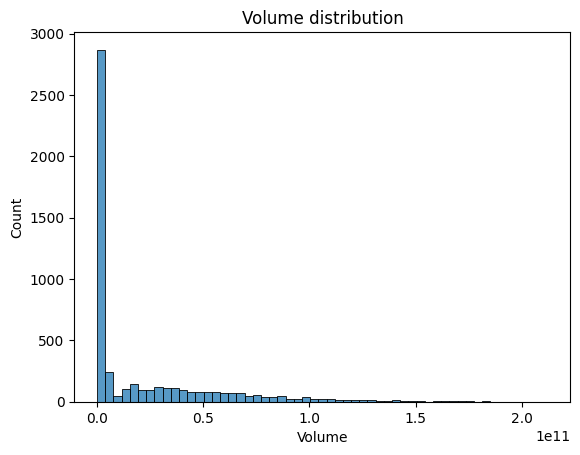

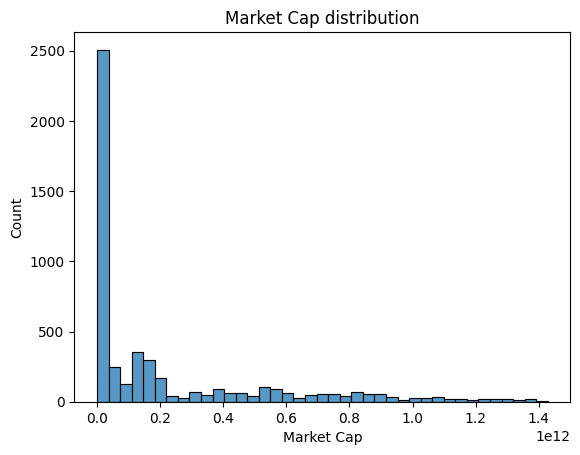

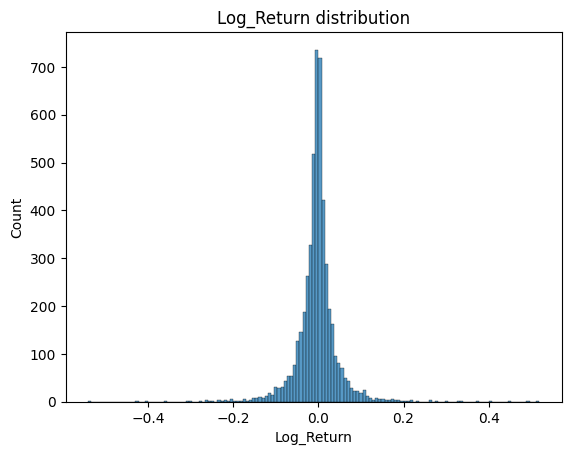

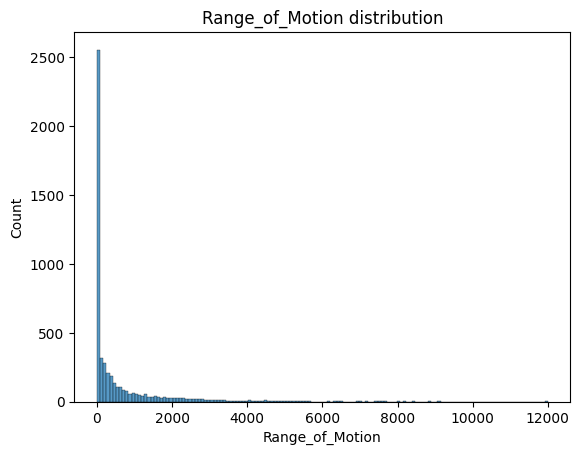

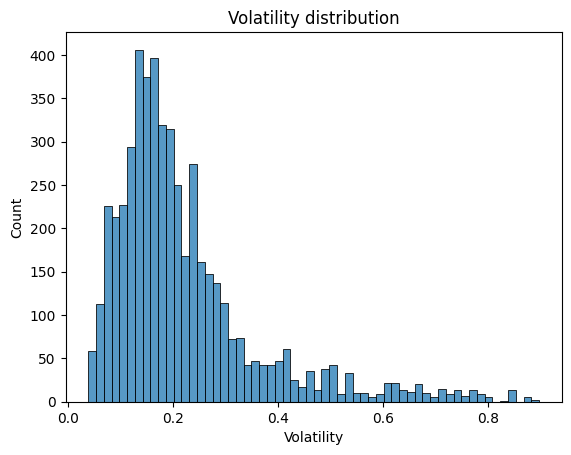

In [23]:
num_col = df.select_dtypes(include='number').columns.tolist()

for num in num_col:
  plt.figure()
  sns.histplot(data=df, x=num,)
  plt.title(f"{num} distribution")
  plt.show()

